# Field Data Analysis
## Data Extraction
### 25/05/2022 

In [1]:
#import segysak
import pathlib
import platform
from IPython.display import display

import os
import pandas as pd
import numpy as np

from netCDF4 import Dataset
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
# Change to data location folder
# Copy the python function ("extract") to the data folder
import extract as ex

C:\Users\hafolahbi\anaconda3\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
help(ex)

Help on module extract:

NAME
    extract

DESCRIPTION
    Created on Thu May 19 22:36:01 2022
    @author: hafolahbi

FUNCTIONS
    extract(file)
        Parameters
        ----------
        file : TYPE
                SEG_Y
            DESCRIPTION.
                Function to extract longitude, latitude and depth of a SEG-Y file obtained from StrataBox
                
                Args:
                    Input the SEG_Y file
                
                Returns:
                    lon, lat, depth (float array)
                
        
        Returns
        -------
        lon : TYPE
            DESCRIPTION.
                Longitude of the file
        lat : TYPE
            DESCRIPTION.
                Latitude of the file
        depth : TYPE
            DESCRIPTION.
                Depth of the file

FILE
    c:\users\hafolahbi\desktop\seg_y_only\extract.py




In [4]:
os.chdir('/users/hafolahbi/Desktop/SEG_Y_only/')
file = "20220522110319P-HF.seg" # One of the data file
ex.extract(file) # Calling and using the function

  0%|          | 0.00/15.8k [00:00<?, ? traces/s]

(0        4.623282
 1        4.623282
 2        4.623282
 3        4.623282
 4        4.623282
            ...   
 15754    4.608522
 15755    4.608522
 15756    4.608522
 15757    4.608518
 15758    4.608518
 Name: SourceX, Length: 15759, dtype: float64,
 0        6.241697
 1        6.241697
 2        6.241697
 3        6.241697
 4        6.241697
            ...   
 15754    6.190656
 15755    6.190656
 15756    6.190656
 15757    6.190640
 15758    6.190640
 Name: SourceY, Length: 15759, dtype: float64,
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 15754    5.9
 15755    5.8
 15756    5.9
 15757    5.4
 15758    5.4
 Name: SourceWaterDepth, Length: 15759, dtype: float64)

## Extracting lon, lat and depth

  0%|          | 0.00/15.8k [00:00<?, ? traces/s]

Text(0.5, 1.0, 'xyz')

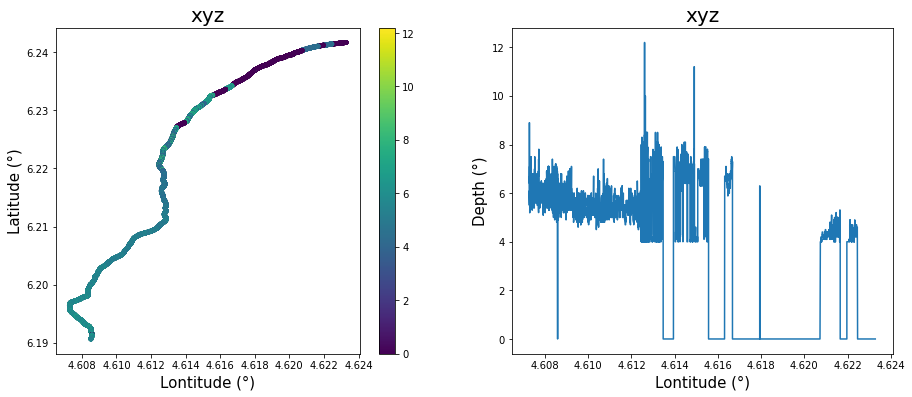

In [5]:
#Calling function
file = "20220522110319P-HF.seg"
lon,lat,depth = ex.extract(file)
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(lon,lat,c=depth,s=15) # 
#plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.ylabel('Latitude (°)',fontsize=15)
plt.xlabel('Lontitude (°)',fontsize=15)
plt.title('xyz',fontsize=20)
#plt.ticklabel_format()
plt.colorbar()
#plt.legend()
# plt.ylim(-0.02,0.12)
# plt.yticks(fontsize=20)
# plt.xticks(fontsize=20)

plt.subplot(122)
#depth = np.ma.masked_where(depth<=0.2, depth)
#np.ma.masked_invalid(depth)
plt.plot(lon,depth)
plt.ylabel('Depth (°)',fontsize=15)
plt.xlabel('Lontitude (°)',fontsize=15)
plt.title('xyz',fontsize=20)
#fig.savefig('extracted')
#plt.plot(lon,depth)

In [6]:
file = "20220522120303P-HF.seg"
lon1,lat1,depth1 = ex.extract(file)
#plt.plot(lon_new,depth_new)
lon = lon.append(lon1)
lat = lat.append(lat1)
depth = depth.append(depth1)

  0%|          | 0.00/12.9k [00:00<?, ? traces/s]

In [7]:
file = "20220522124716P-HF.seg"
lon2,lat2,depth2 = ex.extract(file)
lon = lon.append(lon2)
lat = lat.append(lat2)
depth = depth.append(depth2)

  0%|          | 0.00/17.3k [00:00<?, ? traces/s]

In [8]:
file = "20220522134701P-HF.seg"
lon3,lat3,depth3 = ex.extract(file) #### use n-1, where n is the rank of file which is 4th here (lon4-1)...
lon = lon.append(lon3)
lat = lat.append(lat3)
depth = depth.append(depth3)

  0%|          | 0.00/17.3k [00:00<?, ? traces/s]

In [9]:
file = "20220522144647P-HF.seg"
lon4,lat4,depth4 = ex.extract(file) 
lon = lon.append(lon4)
lat = lat.append(lat4)
depth = depth.append(depth4)
# combined lon, lat and depth of all the output files for first dey survey 

  0%|          | 0.00/19.9k [00:00<?, ? traces/s]

Text(0.5, 0, 'Lontitude (°)')

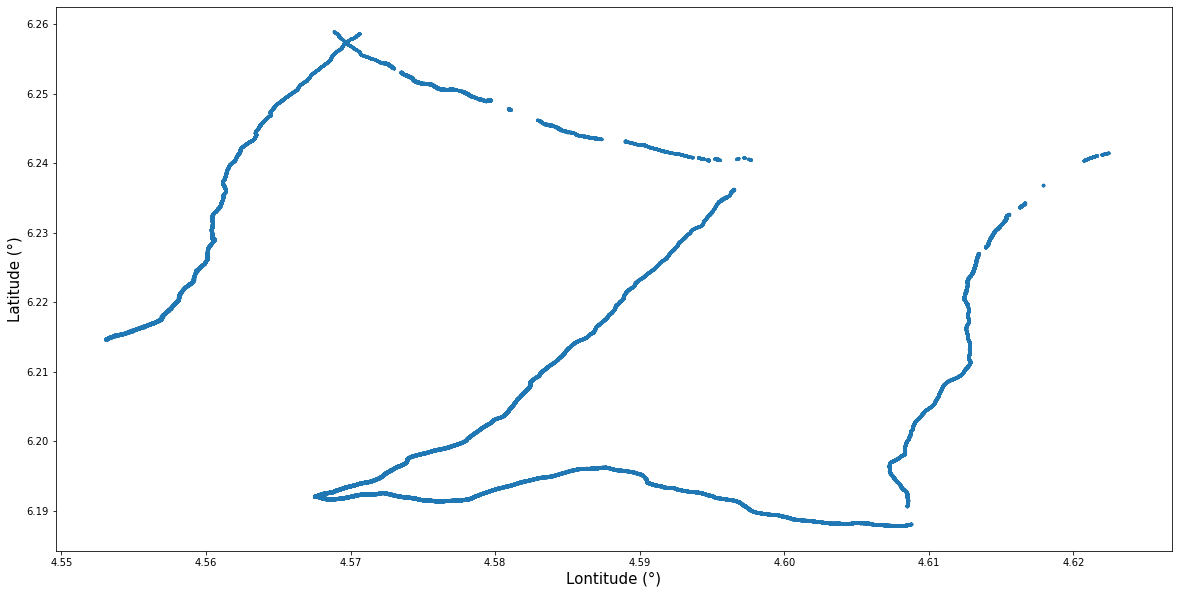

In [10]:
fig=plt.figure(figsize=(20,10)) # Survey path 
plt.scatter(lon,lat,depth)
plt.ticklabel_format(axis='both', style='plain', useOffset=False)
plt.ylabel('Latitude (°)',fontsize=15)
plt.xlabel('Lontitude (°)',fontsize=15)

In [11]:
depth = np.ma.masked_invalid(depth)
np.min(depth), np.max(depth)

(0.0, 23.0)

#### Removing and masking invalid data

In [12]:
depth = np.ma.masked_where(depth<=0.2, depth) #Removing depth values <=0.2. 0.2 is the error value when transducer fail to record
depth = np.ma.masked_invalid(depth)
#depth = depth + 0.2 # 0.2 meters already added to the measured depth
# This 0.2m is the depth from the transducer to the bottom of the boat and was automatically added to the depth during software calibration

### Output variables to csv

In [13]:
# os.chdir('/users/hafolahbi/Desktop/Field/Latif 22_05/All_Excel_combined_python')
# lon = pd.DataFrame(data = lon) # data = variable name to be saved in csv format
# lon.to_csv('lon.csv', index = False, encoding='utf-8')

# lat = pd.DataFrame(data = lat) 
# lat.to_csv('lat.csv', index = False, encoding='utf-8')

# depth = pd.DataFrame(data = depth)
# depth.to_csv('depth.csv', index = False, encoding='utf-8')

# Practice with TWT

In [14]:
#depth1 = np.ma.masked_where(depth1<=0.2, depth1) #Removing depth values <=0.2. 0.2 is the value of the draft
#depth1 = np.ma.masked_invalid(depth1)
twt = 2*depth/1500
twt

masked_array(data=[--, --, --, ..., 0.011333333333333334,
                   0.011333333333333334, 0.011333333333333334],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=1e+20)

In [21]:
#fig=plt.figure(figsize=(20,10))
#plt.plot(lon,twt, color='brown', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.1)
#plt.scatter(lon1,twt)
#twt.plot(cmap='hsv')
#plt.colorbar()
#plt.ylim([0.008,0.035])

In [ ]:
# axs.plt.subplot()
# mesh = axs.pcolormesh(
#     lon1,lat1,twt,
#     shading='auto'
# )
# plt.colorbar(mesh)
# #axs.set_aspect() = plt.colorbar(mesh, orientation='horizontal')

In [ ]:
# os.chdir('/users/hafolahbi/Desktop/Field/')
#data = pd.read_csv('data.csv')